In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd

In [2]:
#Load in monthly data
#then convert columns to lists to have a list of each type of data
with open ('org_data/ClimateData.txt', 'r') as file1:
    lines=file1.readlines()
    time=[]
    temp=[]
    co2=[]
    sea_ice_ext=[]
    pH=[]
    for i in lines:
        fulllines=i.split('\t')
        time.append(fulllines[0].replace("\n", ""))
        temp.append(fulllines[2].replace("\n", ""))
        co2.append(fulllines[1].replace("\n", ""))
        sea_ice_ext.append(fulllines[4].replace("\n", ""))
        pH.append(fulllines[5].replace("\n", ""))

#replace empty values in pH data with NaN (because pH data is missing values)
pH_n=[]
for string in (pH):
    if string == '':
        string = np.nan
    pH_n.append(string)


#convert data entries from strings to floats
times = [float(string) for string in time]
co2s=[float(string) for string in co2]
temps = [float(string) for string in temp]
phs = [float(string) for string in pH_n]
sea_ice_exts = [float(string) for string in sea_ice_ext]

In [3]:
#Load in annual data
#then convert columns to lists to have a list of each type of data
with open ('org_data/ClimateDataAnnual.txt', 'r') as file2:
    lines2=file2.readlines()
    time_y=[]
    temp_y=[]
    co2_y=[]
    sea_ice_ext_y=[]
    for i in lines2:
        fulllines=i.split('\t')
        time_y.append(fulllines[0])
        temp_y.append(fulllines[2])
        co2_y.append(fulllines[1])
        sea_ice_ext_y.append(fulllines[4])


#convert data entries from strings to floats
times_y = [float(string) for string in time_y]
co2s_y=[float(string) for string in co2_y]
temps_y = [float(string) for string in temp_y]
sea_ice_exts_y = [float(string) for string in sea_ice_ext_y]

In [4]:
# load in interpolated pH data
with open ('org_data/pHData.txt', 'r') as file3:
    lines3 = file3.readlines()
    time_int = []
    ph_int = []
    for i in lines3:
        fulllines=i.split('\t')
        time_int.append(fulllines[0])
        ph_int.append(fulllines[1])


time_int = [float(string) for string in time_int]
ph_int = [float(string) for string in ph_int]

# load in interpolated yearly pH data
with open ('org_data/pHDataAnnual.txt', 'r') as file4:
    lines4 = file4.readlines()
    time_y_int = []
    ph_y_int = []
    for i in lines4:
        fulllines=i.split('\t')
        time_y_int.append(fulllines[0])
        ph_y_int.append(fulllines[1])


times_y_int = [float(string) for string in time_y_int]
phs_y_int = [float(string) for string in ph_y_int]


In [5]:
#Can find the minimum and maximum values using min and max functions
#Can determine index of these values using the index function
vals=[]
dates=[]
vals.append(min(temps))
vals.append(min(co2s))
vals.append(min(sea_ice_exts))
vals.append(min(ph_int))
vals.append(max(temps))
vals.append(max(co2s))
vals.append(max(sea_ice_exts))
vals.append(max(ph_int))

temp_min = temps.index(min(temps))
co2_min = co2s.index(min(co2s))
ext_min = sea_ice_exts.index(min(sea_ice_exts))
pH_min = phs.index(min(ph_int))
temp_max = temps.index(max(temps))
co2_max = co2s.index(max(co2s))
ext_max = sea_ice_exts.index(max(sea_ice_exts))
pH_max = phs.index(max(ph_int))

dates.append(times[temp_min])
dates.append(times[co2_min])
dates.append(times[ext_min])
dates.append(times[pH_min])
dates.append(times[temp_max])
dates.append(times[co2_max])
dates.append(times[ext_max])
dates.append(times[pH_max])


In [6]:
# load the data as a pandas dataframe to calculate quantiles
dict = {'Time': times_y, 'CO2': co2s_y, 'Temp': temps_y, 'IceExt': sea_ice_exts_y}
df = pd.DataFrame(dict)
df2=df.set_index('Time')

#dict_m = {'Time': times, 'CO2': co2s, 'Temp': temps, 'IceExt': sea_ice_exts, 'pH': phs}
#dfm = pd.DataFrame(dict_m)
#dfm2=dfm.set_index('Time')

dict_ph = {'Time': times_y_int, 'pH': phs_y_int}
dfph = pd.DataFrame(dict_ph)
dfph2 = dfph.set_index('Time')

In [7]:
dat10 = df2.quantile(.10)
dat90 = df2.quantile(.90)

datph10 = dfph2.quantile(.10)
datph90 = dfph2.quantile(.90)

In [8]:
l_dat = df2 < dat10
h_dat = df2 > dat90

l_dat_ph = dfph2 < datph10
h_dat_ph = dfph2 > datph90

In [9]:
l_dat_t=l_dat.sum(axis=1)
l_dat_t_5=l_dat_t.groupby(l_dat_t.index // 5).sum()

h_dat_t=h_dat.sum(axis=1)
h_dat_t_5=h_dat_t.groupby(h_dat_t.index // 5).sum()

times_y_5=['1979-1984','1984-1989','1989-1994','1994-1999','19992004','2004-2009','2009-2014','2014-2019','2019-2024','2024']

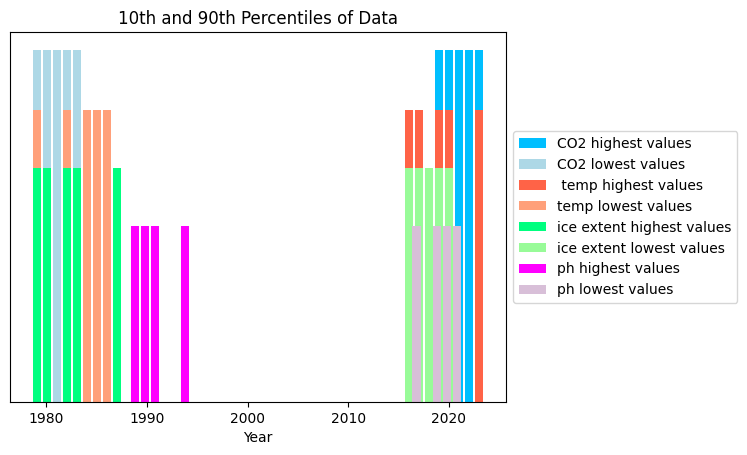

In [10]:
plt.bar(times_y,2*h_dat['CO2'],color='deepskyblue',label='CO2 highest values')
plt.bar(times_y,2*l_dat['CO2'],color='lightblue',label='CO2 lowest values')
plt.bar(times_y,1.66*h_dat['Temp'],color='tomato',label=' temp highest values')
plt.bar(times_y,1.66*l_dat['Temp'],color='lightsalmon',label='temp lowest values')
plt.bar(times_y,1.33*h_dat['IceExt'],color='springgreen',label='ice extent highest values')
plt.bar(times_y,1.33*l_dat['IceExt'],color='palegreen',label='ice extent lowest values')
plt.bar(times_y_int,h_dat_ph['pH'],color='magenta',label='ph highest values')
plt.bar(times_y_int,l_dat_ph['pH'],color='thistle',label='ph lowest values')

ax = plt.gca()
#hide x-axis
ax.get_yaxis().set_visible(False)
plt.xlabel('Year')
plt.title("10th and 90th Percentiles of Data")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('images/quantiles.pdf', dpi=300, bbox_inches='tight')